## Linear regression in Python

### With `pandas` / `patsy` / `statsmodels` / `sklearn`

`statsmodels` uses `patsy` to provide formula syntax similar to `R`'s.

Formulas in `R` (and `patsy`) look like this:

```
Y ~ X1 + X2 + X3
```

For more details on how they work, see the `patsy` [documentation](https://patsy.readthedocs.org/).

In Python, start with data in `pandas` data frames:

In [20]:
import pandas as pd
import matplotlib as plt
import numpy as np
%matplotlib inline

pd.set_option('display.mpl_style', 'default')               # Produces pretty plots!
plt.rcParams['figure.figsize'] = (8, 8)  

In [45]:
url = "http://data.princeton.edu/wws509/datasets/salary.dat"

In [46]:
data = pd.read_csv(url, sep='\s+')

In [30]:
data.head()

,sx,rk,yr,dg,yd,sl
0,male,full,25,doctorate,35,36350
1,male,full,13,doctorate,22,35350
2,male,full,10,doctorate,23,28200
3,female,full,7,doctorate,27,26775
4,male,full,19,masters,30,33696


`patsy` can produce design matrices from formula specifications:

In [31]:
data.describe()

,yr,yd,sl
count,52.000000,52.000000,52.000000
mean,7.480769,16.115385,23797.653846
std,5.507536,10.222340,5917.289154
min,0.000000,1.000000,15000.000000
25%,3.000000,6.750000,18246.750000
50%,7.000000,15.500000,23719.000000
75%,11.000000,23.250000,27258.500000
max,25.000000,35.000000,38045.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x114262110>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1148d9750>]], dtype=object)

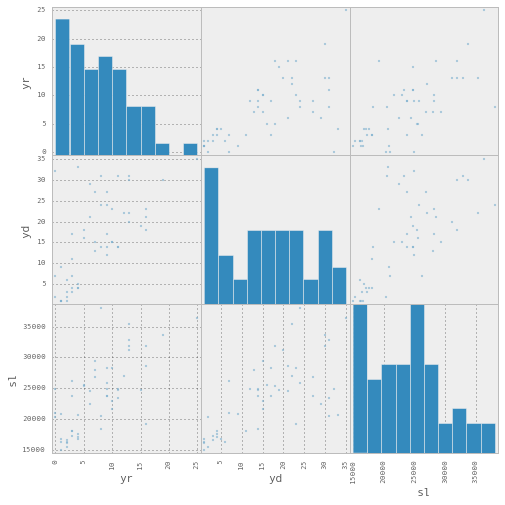

In [32]:
# Lets take a look at our entire model
pd.tools.plotting.scatter_matrix(data)

In [43]:
from patsy import dmatrices

In [6]:
y, X = dmatrices('sl ~ sx + yr + rk', data=data, return_type='dataframe')

In [8]:
X.head()

,Intercept,sx[T.male],rk[T.associate],rk[T.full],yr
0,1,1,0,1,25
1,1,1,0,1,13
2,1,1,0,1,10
3,1,0,0,1,7
4,1,1,0,1,19


In [9]:
y.head()

,sl
0,36350
1,35350
2,28200
3,26775
4,33696


`statsmodels` includes an array of modeling techniques, including linear regression, with diagnostic output that resembles Stata's. (There is good [documentation](http://statsmodels.sourceforge.net/devel/index.html).)

In [4]:
import statsmodels.api as sm

In [11]:
model = sm.OLS(y, X)
results = model.fit()

Note that in `statsmodels`, a model is different from a model's fitted results.

In [12]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     sl   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     64.64
Date:                Fri, 08 Jul 2016   Prob (F-statistic):           1.64e-18
Time:                        07:05:56   Log-Likelihood:                -476.26
No. Observations:                  52   AIC:                             962.5
Df Residuals:                      47   BIC:                             972.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Intercept        1.643e+04    737.966     22.265      0.000      1.49e+04  1.79e+04
sx[T.male]       -524.1492    834.687     -0.628      0.533     -2203.323  1155.024
rk[T.associate]  4373.9154    906.124      4.827      0.000      2551.030  6196.801
rk[T.full]       9483.8419    912.795     10.390      0.000      7647.536  1.13e+04
yr                390.9358     75.383      5.186      0.000       239.285   542.587
==============================================================================
Omnibus:                       23.039   Durbin-Watson:                   1.832
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.727
Skew:                           1.410   Prob(JB):                     3.90e-09
Kurtosis:                       6.150   Cond. No.                         32.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

`statsmodels` also integrates the `patsy` model interface for model specification, which makes it easy to quickly try a lot of different designs.

In [25]:
import statsmodels.formula.api as smf

In [26]:
results = smf.ols(formula="sl ~ sx + yr + rk", data=data).fit()

In [27]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     sl   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     64.64
Date:                Fri, 08 Jul 2016   Prob (F-statistic):           1.64e-18
Time:                        07:21:24   Log-Likelihood:                -476.26
No. Observations:                  52   AIC:                             962.5
Df Residuals:                      47   BIC:                             972.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Intercept        1.643e+04    737.966     22.265      0.000      1.49e+04  1.79e+04
sx[T.male]       -524.1492    834.687     -0.628      0.533     -2203.323  1155.024
rk[T.associate]  4373.9154    906.124      4.827      0.000      2551.030  6196.801
rk[T.full]       9483.8419    912.795     10.390      0.000      7647.536  1.13e+04
yr                390.9358     75.383      5.186      0.000       239.285   542.587
==============================================================================
Omnibus:                       23.039   Durbin-Watson:                   1.832
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.727
Skew:                           1.410   Prob(JB):                     3.90e-09
Kurtosis:                       6.150   Cond. No.                         32.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

`sklearn` does not integrate `patsy`, but it offers far more modeling options. The [documentation](http://scikit-learn.org/stable/documentation.html) is quite good. Check out the section on [Linear Models](http://scikit-learn.org/stable/modules/linear_model.html).

In [28]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, normalize=False)

Note that in `sklearn`, a model is changed in place when you fit it.

Also, `sklearn` has a different approach to statistical diagnostics.

In [29]:
model.score(X, y)

0.8461760134902937

In [19]:
model.coef_

array([[    0.        ,  -524.14921086,  4373.91539051,  9483.84186941,
          390.93575731]])

In [20]:
model.intercept_

array([ 16430.96168389])

In [9]:
data.head()

,sx,rk,yr,dg,yd,sl
0,male,full,25,doctorate,35,36350
1,male,full,13,doctorate,22,35350
2,male,full,10,doctorate,23,28200
3,female,full,7,doctorate,27,26775
4,male,full,19,masters,30,33696


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x112f7fa90>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x113fb0b50>]], dtype=object)

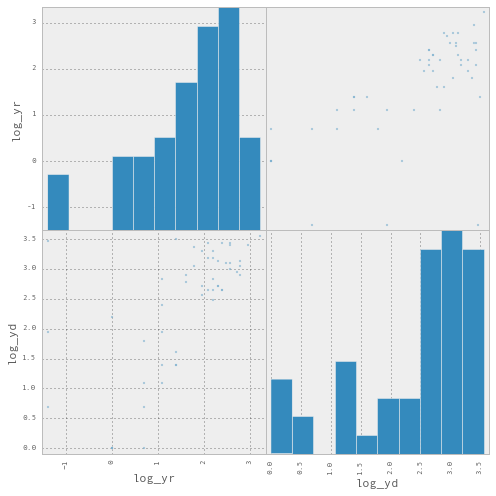

In [47]:
# Try a transformation: 

data.yr=data.yr.replace({0:.25})

data['log_yr']=np.log(data.yr)
data['log_yd']=np.log(data.yd)

trans=data[['log_yr','log_yd']]
pd.tools.plotting.scatter_matrix(trans)

In [48]:
data.head(1)

,sx,rk,yr,dg,yd,sl,log_yr,log_yd
0,male,full,25,doctorate,35,36350,3.218876,3.555348


In [93]:
y, X = dmatrices('sl ~ sx + log_yr + rk', data=data, return_type='dataframe')
X.head()

,Intercept,sx[T.male],rk[T.associate],rk[T.full],log_yr
0,1,1,0,1,3.218876
1,1,1,0,1,2.564949
2,1,1,0,1,2.302585
3,1,0,0,1,1.945910
4,1,1,0,1,2.944439


In [59]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)

model.score(X,y)

0.80502226412887823

In [64]:
from sklearn import cross_validation as cv
from sklearn import metrics

In [65]:
x_train, x_test, y_train, y_test = cv.train_test_split(X,y,test_size=0.333,random_state=1234)

model = LinearRegression().fit(x_train, y_train)

In [67]:
sum_squares_regr= np.sum((model.predict(x_train) -np.mean(y_train))**2)
# estimated value of y - y_mean
total_sum_squares=np.sum((y_train-np.mean(y_train))**2)
r_squared = sum_squares_regr / total_sum_squares

print sum_squares_regr
print total_sum_squares
print r_squared

18


In [70]:
metrics.mean_squared_error(y_train,model.predict(x_train))

7331861.5702295639

In [69]:
#model.score(x_train, y_train)
metrics.mean_squared_error(y_test,model.predict(x_test))

7238798.066461714

In [103]:
from sklearn.cross_validation import KFold
kf = KFold(52, n_folds=2)

In [117]:
for train_index, test_index in kf:
    #X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    #y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    ## Fit on Train! 
    clf2 = LinearRegression().fit(X.iloc[train_index], y.iloc[train_index])
    # Score on Test! 
    print clf2.coef_, metrics.mean_squared_error(y.iloc[test_index], clf2.predict(X.iloc[test_index]))
    

 [[    0.           481.30675018  4914.94071444  7453.18645257
    876.58577544]] 18848450.5528
[[     0.          -5314.52532886   5993.67129209  11979.83012477
    3466.99697513]] 23725324.9529
